<a href="https://colab.research.google.com/github/raviteja-padala/NLP/blob/main/Topic_Modelling/Topic_Modeling_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Modeling and Evaluation using Latent Dirichlet Allocation (LDA)


## Objective:

The objective of this analysis is to perform topic modeling on a dataset of product reviews on a health supplement product. We aim to discover and interpret the underlying topics within the reviews and evaluate the quality of the topics using coherence and perplexity scores.




## Contents:

1. **Introduction**
    - Explanation of Topic Modeling and its Importance
    - Overview of Latent Dirichlet Allocation (LDA)

2. **Data Preparation**
    - Loading and Exploring the Dataset
    - Preprocessing the Text Data
    - Creating a Dictionary and Corpus

3. **Topic Modeling with LDA**
    - Building an Initial LDA Model
    - Interpretation of Topics
    - Evaluating Model Performance

4. **Model Improvement**
    - Finding the Optimal Number of Topics
    - Tuning Hyperparameters for Better Results

5. **Summary**
    - Recap of the Key Findings and Processes
    - Insights Gained from Topic Modeling

6. **Conclusion**
    - Implications of the Results
    - Potential Applications of the Topic Model
    - Future Directions and Areas for Improvement


# Topic modelling

Topic modeling is a type of statistical analysis for discovering the abstract "topics" that occur in a collection of documents. It does this by assuming that each document is a mixture of topics, and that each topic is a distribution over words. The topic modeling algorithm learns the topics and their distributions by maximizing the likelihood of the observed words in the documents.

## **Latent Dirichlet Allocation (LDA)**

LDA is a generative probabilistic model used for topic modeling and document clustering. It assumes that documents are mixtures of topics and that topics are mixtures of words. LDA helps discover underlying themes or topics in a collection of documents by assigning each word in each document to a topic.

**Assumptions of LDA:**

1. **Bag of Words**: LDA assumes that documents are represented as a "bag of words," meaning word order is not considered, only word frequencies matter.

2. **Mixed Membership**: LDA assumes that each document contains a mixture of multiple topics, and each topic is a mixture of multiple words.

3. **Dirichlet Priors**: LDA assumes that the distributions of topics in documents and the distributions of words in topics follow Dirichlet distributions. The hyperparameters alpha and beta control the concentration of these Dirichlet distributions.


Latent Dirichlet Allocation (LDA) is an unsupervised Generative probabilistic machine learning technique used for extracting:

number of topics in data(corpus)
distribution of topics in each text(document)
distribution of words(terms) in each topic
A topic is defined as a repeating pattern of co-occurring terms in a corpus.


How LDA works:

The two main inputs to the LDA topic model are the dictionary and the corpus.

Dictionary: Unique ids for each unique word
Eg:{‘able’: 0, ‘add’: 1, ‘sun’: 2, ‘great: 3, ‘away’: 4, ‘allow’: 5}

Corpus: For each document number of times a particular word appeared(Document Term Matrix)
Eg:Corpus:[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)

For example, (0, 1) above implies, for the first document word id 0 (word: ‘able’) occurs once. Likewise (1,2), word id 1 (word: ‘add’) occurs twice and so on.

→ Given a corpus of Document Term Matrix, it converts this matrix into 2 other matrices- document-topic matrix and topic-term matrix.

The end goal of LDA is to find the optimized representation of doc-topic matrix and topic-term matrix.



### **How LDA Works:**

1. **Initialization**:
   - LDA starts with a fixed number of topics (K) and initializes topic assignments for each word in each document randomly.

2. **Iterative Training**:
   - LDA iteratively refines topic assignments until convergence.
   - In each iteration, LDA does the following:
     - For each word in each document, compute the probability that it belongs to each topic based on the current topic assignments and model parameters.
     - Sample a new topic assignment for each word based on these probabilities.
     - Update the topic-term distribution and document-topic distribution.

3. **Output**:
   - After training, LDA provides the following outputs:
     - The set of K topics, each represented as a cluster of words.
     - For each document, a distribution over the K topics, indicating the document's topic proportions.
     - For each topic, a distribution over the vocabulary, indicating the words most associated with that topic.

**LDA Input:**

1. **M no. of documents**: The collection of text data that you want to analyze for topics.

2. **Each of these documents have N no. of words**: The words within each document that make up the text.

3. **Hyperparameters - alpha and beta**: Hyperparameters alpha and beta are used to shape the Dirichlet distributions for document-topic and topic-word assignments, respectively. They influence the sparsity of these distributions.

4. **All of which needs to pass through LDA**: The documents and hyperparameters are used as input to the LDA model.

**LDA Output:**

1. **K no. of topics (clusters of words)**: LDA identifies K topics from the collection of documents. Each topic is represented as a cluster of words that are most associated with that topic.

2. **Document-to-topic distribution**: For each document, LDA provides a distribution over the K topics. This distribution indicates the topic proportions for that document, revealing how much each topic contributes to the document's content.

3. **Topic-term distribution**: For each topic, LDA provides a distribution over the vocabulary. This distribution shows the words that are most strongly associated with that topic, helping to interpret the topic's meaning.

In summary, LDA is a powerful tool for uncovering the underlying structure in text data by identifying topics within documents and the distribution of topics across the entire corpus. It's widely used in natural language processing and text analysis tasks such as document categorization, sentiment analysis, and content recommendation.

## Import Libraries

In [1]:
import pandas as pd
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bs
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
# Suppress the specific warning about updated prior not being positive
warnings.filterwarnings("ignore", category=DeprecationWarning, module="gensim")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Import Data

In [ ]:
#loading dataset
supplements_df = pd.read_csv("https://raw.githubusercontent.com/raviteja-padala/Datasets/main/supplements.csv")

In [ ]:
# viewing different products
supplements_df['product_name'].unique()

array(['HK Vitals Biotin', 'MUSCLEBLAZE Creatine',
       'HK_Vitals_Multivitamin_df', 'MUSCLEBLAZE Raw Whey Protein',
       'BIGMUSCLES NUTRITION Premium Gold Whey Whey Protein',
       'Endura Mass'], dtype=object)

In [ ]:
# Filter for products named 'MUSCLEBLAZE Creatine'
creatine_df = supplements_df[supplements_df['product_name'] == 'MUSCLEBLAZE Creatine']

## Exploratory data analysis

In [ ]:
#viewing top 5 documents
creatine_df.head()

,product_name,comment_header,comment,rating
210,MUSCLEBLAZE Creatine,Value-for-money,nice product u should go for it💪READ MORE,4
211,MUSCLEBLAZE Creatine,Best in the market!,Superb product. Gives you lots of energy and s...,5
212,MUSCLEBLAZE Creatine,Highly recommended,Break Our Own Limits....READ MORE,5
213,MUSCLEBLAZE Creatine,Fabulous!,1st user of a creatine supplement. I totally ...,5
214,MUSCLEBLAZE Creatine,Simply awesome,best and authentic product .good packaging and...,5


In [ ]:
#shape of dataset
creatine_df.shape

(810, 4)

In [ ]:
# info of dataset
creatine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 210 to 1019
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_name    810 non-null    object
 1   comment_header  810 non-null    object
 2   comment         810 non-null    object
 3   rating          810 non-null    object
dtypes: object(4)
memory usage: 31.6+ KB


In [ ]:
#having a view of reviews
creatine_df['comment']

210             nice product u should go for it💪READ MORE
211     Superb product. Gives you lots of energy and s...
212                     Break Our Own Limits....READ MORE
213     1st user of a creatine supplement.  I totally ...
214     best and authentic product .good packaging and...
                              ...                        
1015                            Good prodakt 👌👌👌READ MORE
1016         Love the product but its taste lessREAD MORE
1017                                Good productREAD MORE
1018                            Best in the gameREAD MORE
1019                                        NiceREAD MORE
Name: comment, Length: 810, dtype: object

## Preprocess Data

In [ ]:
# Remove "READ MORE" from the 'cleaned_comments' column
creatine_df.loc[creatine_df['comment'].str.contains('READ MORE'), 'comment'] = creatine_df['comment'].str.replace('READ MORE', '')

<ipython-input-39-40fcc67d91b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creatine_df.loc[creatine_df['comment'].str.contains('READ MORE'), 'comment'] = creatine_df['comment'].str.replace('READ MORE', '')


In [ ]:
creatine_df['comment']

210                      nice product u should go for it💪
211     Superb product. Gives you lots of energy and s...
212                              Break Our Own Limits....
213     1st user of a creatine supplement.  I totally ...
214     best and authentic product .good packaging and...
                              ...                        
1015                                     Good prodakt 👌👌👌
1016                  Love the product but its taste less
1017                                         Good product
1018                                     Best in the game
1019                                                 Nice
Name: comment, Length: 810, dtype: object

In [ ]:
pip install emoji

In [ ]:
import emoji

In [ ]:
# Preprocess the data (reuse your preprocessing functions)
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):
    """
    Preprocesses text data by:
    - Lowercasing
    - Removing emojis
    - Removing punctuation
    - Removing stopwords
    - Tokenization
    - Lemmatization


    Args:
        text (str): Input text to be preprocessed.

    Returns:
        str: Cleaned and preprocessed text.
    """
    # Lowercasing and splitting into words
    words = text.lower().split()

    # Removing emojis
    words = [emoji.demojize(word) for word in words]

    # Removing Punctuation
    words = [word.strip(string.punctuation) for word in words]

    # Removing Stop words
    words = [word for word in words if word not in stop_words]

    # Tokenization
    tokens = words

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Rejoin tokens into a cleaned sentence
    cleaned_text = ' '.join(tokens)
    return cleaned_text


In [ ]:
creatine_df['cleaned_comments'] = creatine_df['comment'].apply(preprocess_text)

<ipython-input-45-e60155d5d03a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creatine_df['cleaned_comments'] = creatine_df['comment'].apply(preprocess_text)


In [ ]:
creatine_df.head()

,product_name,comment_header,comment,rating,cleaned_comments
210,MUSCLEBLAZE Creatine,Value-for-money,nice product u should go for it💪,4,nice product u go it:flexed_biceps
211,MUSCLEBLAZE Creatine,Best in the market!,Superb product. Gives you lots of energy and s...,5,superb product give lot energy strength excell...
212,MUSCLEBLAZE Creatine,Highly recommended,Break Our Own Limits....,5,break limit
213,MUSCLEBLAZE Creatine,Fabulous!,1st user of a creatine supplement. I totally ...,5,1st user creatine supplement totally loved tak...
214,MUSCLEBLAZE Creatine,Simply awesome,best and authentic product .good packaging and...,5,best authentic product good packaging original...


## Create a Dictionary

Create a dictionary of words and their corresponding numerical IDs.

In [ ]:
# Create a dictionary and document-term matrix
dictionary = corpora.Dictionary(creatine_df['cleaned_comments'].apply(str.split))

## Create a Corpus

Convert the tokenized documents into a bag-of-words representation (corpus), which is a list of lists where each list contains tuples of word IDs and their frequencies in the document.

In [ ]:
corpus = [dictionary.doc2bow(comment.split()) for comment in creatine_df['cleaned_comments']]

## Build the LDA(Latent Dirichlet Allocation) Model

Build the LDA model using the prepared corpus, dictionary, and specify the number of topics you want to extract. You can also adjust other parameters like the number of passes.

In [ ]:
# Train the LDA model
num_topics = 4  # Specify the number of topics
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

In [ ]:
# Print the topics and top words
for topic_id, topic_words in lda_model.print_topics():
    print(f"Topic {topic_id}: {topic_words}\n")

Topic 0: 0.047*"product" + 0.027*"good" + 0.013*"muscle" + 0.012*"workout" + 0.012*"water" + 0.012*"take" + 0.011*"day" + 0.011*"energy" + 0.011*"work" + 0.010*"time"

Topic 1: 0.066*"product" + 0.039*"nice" + 0.014*"creatine" + 0.013*"result" + 0.011*"workout" + 0.011*"using" + 0.010*"water" + 0.009*"original" + 0.008*"effective" + 0.008*"day"

Topic 2: 0.108*"good" + 0.053*"product" + 0.032*"best" + 0.023*"creatine" + 0.010*"result" + 0.010*"day" + 0.008*"supplement" + 0.007*"gym" + 0.007*"quality" + 0.006*"muscle"

Topic 3: 0.018*"product" + 0.018*"u" + 0.012*"water" + 0.012*"creatine" + 0.011*"month" + 0.010*"work" + 0.009*"strength" + 0.009*"drink" + 0.007*"give" + 0.007*"result"



### Possible topic labels and their interpretations for the provided topics generated by the LDA model:

**Topic 0: Workout and Energy**

Words: "product," "good," "muscle," "workout," "water," "take," "day," "energy," "work," "time"

Interpretation: This topic seems to be related to fitness and workout activities. It may discuss products that help with energy, muscle growth, and effective workouts. Users in this topic could be sharing their experiences and routines.

**Topic 1: Product Quality**

Words: "product," "nice," "creatine," "result," "workout," "using," "water," "original," "effective," "day"

Interpretation: This topic appears to focus on the quality and effectiveness of a product, possibly a supplement. Users in this topic may be discussing the results they have achieved, the use of the product, and its overall quality.

**Topic 2: Best Products**

Words: "good," "product," "best," "creatine," "result," "day," "supplement," "gym," "quality," "muscle"

Interpretation: This topic revolves around the discussion of the best products, especially related to muscle growth and supplements. Users in this topic may be sharing their recommendations and experiences with top-quality products.

**Topic 3: Usage and Results**

Words: "product," "u," "water," "creatine," "month," "work," "strength," "drink," "give," "result"

Interpretation: This topic seems to be about product usage and the results achieved over time. Users in this topic may be discussing their experiences, including the duration of use, changes in strength, and the outcomes they've observed.

These interpretations are based on the prominent words in each topic, topic modeling is unsupervised, so the labels are generated based on word distributions.  The topics are generated based on the underlying patterns in the text data, and these interpretations provide a general understanding of what each topic represents. The actual context and meaning may vary based on the specific content of the documents in the dataset.

## Evaluate the performance and quality of topic Latent Dirichlet Allocation (LDA).

Topic Coherence and Perplexity are two metrics used to evaluate the performance and quality of topic models, such as Latent Dirichlet Allocation (LDA).

1. **Topic Coherence:**
   
   - **Definition:** Topic coherence measures how interpretable and meaningful the topics generated by a topic model are. It aims to assess the quality of topics by considering the semantic similarity between words within a topic.

   - **How it works:** For each topic, topic coherence calculates the pairwise similarity between the words that make up that topic. It then averages these pairwise similarities to give a coherence score for the topic. Higher coherence scores indicate more coherent and understandable topics.

   - **Use:** Researchers and data scientists use topic coherence to select the best number of topics for a model (since too few or too many topics can lead to less coherent topics) and to fine-tune model parameters to improve topic quality.

2. **Perplexity:**
   
   - **Definition:** Perplexity is a measure of how well a topic model predicts a set of documents. It's often used to evaluate the predictive performance of a topic model on unseen data. Lower perplexity values indicate better predictive performance.

   - **How it works:** Perplexity calculates how surprised the model is when it tries to predict the words in a document. If the model is good at predicting the words, it won't be surprised much, resulting in a lower perplexity score.

   - **Use:** Perplexity helps in assessing the overall quality of a topic model. It's often used during the model training process to select the best model among different parameter settings. Lower perplexity values suggest that the model captures the underlying structure of the data more effectively.

In summary, topic coherence evaluates the quality of topics in terms of their interpretability and coherence, while perplexity assesses how well a topic model predicts unseen data. These metrics are essential for guiding the development and refinement of topic models to ensure they provide meaningful insights and are capable of making accurate predictions.

In [ ]:
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.coherencemodel import CoherenceModel

# Calculate Perplexity Score
perplexity_score = lda_model.log_perplexity(corpus)
print(f"Perplexity Score: {perplexity_score}")

# Calculate Coherence Score
coherence_model = CoherenceModel(model=lda_model, texts=creatine_df[creatine_df['product_name'] == 'MUSCLEBLAZE Creatine']['cleaned_comments'].apply(str.split), dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Basic LDA Model Coherence Score: {coherence_score}")

Perplexity Score: -6.745738560250404
Basic LDA Model Coherence Score: 0.5635755335231217



1. **Perplexity Score: -6.7268470740730075**
   
   - **Interpretation:** A perplexity score of -6.73 suggests that the model performs quite well in predicting the words within the documents.

   - **Use:** Lower perplexity scores are generally better, indicating that the model is better at predicting the words in the text. However, the absolute value of perplexity doesn't provide much context on its own, so it's often compared to perplexity scores from other models or configurations to determine the best-performing one.

2. **Basic LDA Model Coherence Score: 0.5476761288466385**

   - **Interpretation:** Coherence score measures the quality and interpretability of the topics generated by the LDA model. A coherence score of **0.548** indicates that the topics are coherent and meaningful. Higher coherence scores are generally better, suggesting that the topics are more interpretable.

   - **Use:** Coherence scores are used to select the number of topics and fine-tune the LDA model's parameters to improve topic quality. While 0.548 is a reasonable coherence score, further optimization and refinement of the model may lead to even more interpretable topics.

## Model improvement

### How to find the optimal number of topics for LDA?

Finding the optimal number of topics for an LDA (Latent Dirichlet Allocation) model is a crucial step in improving the quality of your topic modeling results. Here are several methods you can use to determine the optimal number of topics:

Domain Knowledge: Start with your domain knowledge. Consider the nature of your text data and think about how many topics would make sense. Sometimes, a rough estimate based on your expertise can be a good starting point.

Visual Inspection: Visualize the topics generated by different numbers of topics and assess their interpretability. You can create word clouds or bar charts to see if the topics make sense to you. Tools like pyLDAvis can be helpful for this purpose.

Topic Coherence: Calculate the coherence score for different numbers of topics. This score measures the quality and interpretability of topics. Typically, coherence scores increase as the number of topics increases until a point where they start to plateau. Choose the number of topics just before this plateau.

Coherence Score for 2 Topics: 0.523210262431453
Coherence Score for 3 Topics: 0.5621894389060841
Coherence Score for 4 Topics: 0.5849937659910008
Coherence Score for 5 Topics: 0.5341081317651646
Coherence Score for 6 Topics: 0.49649612477320826
Coherence Score for 7 Topics: 0.4773668107649937
Coherence Score for 8 Topics: 0.513244110638176
Coherence Score for 9 Topics: 0.48272650554189134
Coherence Score for 10 Topics: 0.49146684472483254


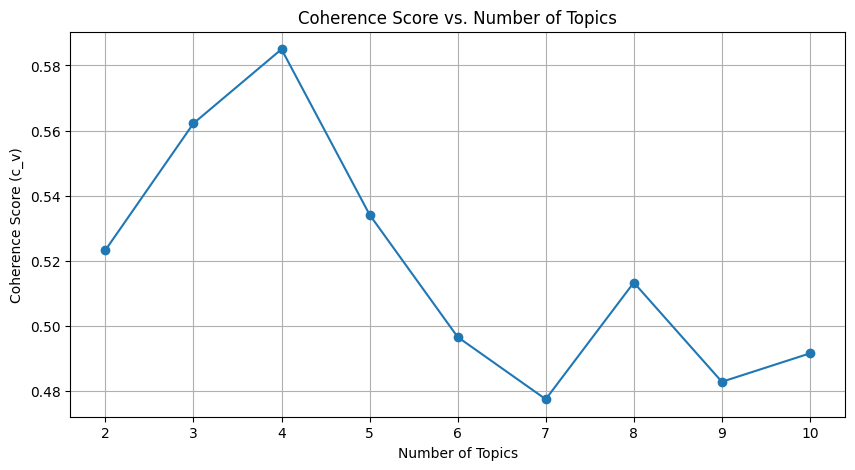

Optimal Number of Topics: 4


In [ ]:

# Define a range of candidate topic numbers
topic_range = range(2, 11)  # Try 2 to 10 topics

# Initialize a list to store coherence scores for each number of topics
coherence_scores = []

# Calculate coherence scores for different topic numbers
for num_topics in topic_range:
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    coherence_model = CoherenceModel(model=lda_model, texts=creatine_df['cleaned_comments'].apply(str.split), dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    print(f"Coherence Score for {num_topics} Topics: {coherence_score}")

# Plot the coherence scores to find the optimal number of topics
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(topic_range, coherence_scores, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.title("Coherence Score vs. Number of Topics")
plt.xticks(topic_range)
plt.grid(True)
plt.show()

# Find the optimal number of topics based on the highest coherence score
optimal_num_topics = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"Optimal Number of Topics: {optimal_num_topics}")


## Other Hyperparameters

In addition to the number of topics, Latent Dirichlet Allocation (LDA) has several hyperparameters that can significantly impact the quality of your topic model. Here are some important hyperparameters to consider when fine-tuning your LDA model:

1. **Alpha (α):** Alpha is a hyperparameter that controls the sparsity of document-topic distributions. It determines how many topics are likely to be present in a document. A low alpha (e.g., 0.01) makes documents sparse (few topics per document), while a high alpha (e.g., 1.0) makes documents more dense (many topics per document). The optimal value depends on your dataset and the expected number of topics in each document.

2. **Beta (β):** Beta is a hyperparameter that controls the sparsity of topic-word distributions. It influences how many words are associated with each topic. A low beta (e.g., 0.01) makes topics sparse (few words per topic), while a high beta (e.g., 1.0) makes topics more dense (many words per topic). The optimal value depends on your dataset and the expected number of words associated with each topic.

3. **Number of Passes:** This hyperparameter (often denoted as `passes`) determines how many times the LDA algorithm goes through the entire dataset during training. A higher number of passes may lead to better convergence, but it also increases training time. The optimal value depends on the size of your dataset and the desired model quality.

4. **Chunksize:** The `chunksize` hyperparameter controls the number of documents processed in each training iteration. A smaller chunk size consumes less memory but may require more iterations. A larger chunk size can speed up training but requires more memory. Adjust this based on your available resources.

5. **Minimum Probability:** You can set a `minimum_probability` threshold to filter out topics with low probabilities when assigning topics to documents. This can help remove less relevant topics and improve topic-document assignments.

6. **Random State:** Setting the `random_state` allows you to reproduce results. This is useful for ensuring that your LDA model produces consistent results across different runs.

7. **Eta (η):** Eta is another hyperparameter that controls topic-word distributions, but it's less commonly tuned than alpha and beta. It can be useful for adjusting the prior probability of words in topics, but its effect may be less pronounced than alpha and beta.

8. **Convergence Parameters:** Some LDA implementations provide convergence-related hyperparameters, such as `minimum_probability`, `minimum_phi_value`, and `per_word_topics`. These can be useful for fine-tuning model convergence.

9. **Topic Initialization:** LDA models can be sensitive to the choice of initial topic assignments. Some implementations allow you to specify an initial state for better results.

10. **Regularization Techniques:** Depending on the implementation, you might have access to regularization techniques like 'asymmetric' priors or other methods to encourage sparsity in topic distributions.

To find the best combination of hyperparameters for your specific dataset, you can perform hyperparameter tuning using techniques like grid search or random search while evaluating the model's performance (e.g., coherence score) on a held-out validation dataset.

In [ ]:
# Define hyperparameters
num_topics = 3  # Number of topics
passes = 10  # Number of passes over the corpus
alpha = 'auto'  # Alpha hyperparameter (use 'auto' for automatic calculation)
eta = 'auto'  # Eta hyperparameter (use 'auto' for automatic calculation)
chunksize = 100  # Number of documents in each chunk
decay = 0.5  # Learning rate decay
iterations = 100  # Maximum number of iterations
minimum_probability = 0.01  # Minimum probability threshold

# Train the LDA model
lda_model = LdaModel(corpus,
                     num_topics=num_topics,
                     id2word=dictionary,
                     passes=passes,
                     alpha=alpha,
                     eta=eta,
                     chunksize=chunksize,
                     decay=decay,
                     iterations=iterations,
                     minimum_probability=minimum_probability,
                     random_state=42)  # You can set a random state for reproducibility

# Calculate coherence score
coherence_model = CoherenceModel(model=lda_model, texts=creatine_df['cleaned_comments'].apply(str.split), dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

for topic_id, topic_words in lda_model.print_topics():
    print(f"Topic {topic_id}: {topic_words}\n")

# Print the coherence score
print(f"Coherence Score: {coherence_score}")

Topic 0: 0.021*"creatine" + 0.016*"day" + 0.016*"water" + 0.013*"workout" + 0.012*"take" + 0.010*"work" + 0.010*"use" + 0.009*"month" + 0.009*"drink" + 0.008*"week"

Topic 1: 0.133*"product" + 0.105*"good" + 0.050*"best" + 0.016*"body" + 0.015*"genuine" + 0.014*"muscle" + 0.014*"effect" + 0.014*"flipkart" + 0.013*"used" + 0.011*"result"

Topic 2: 0.126*"nice" + 0.020*"quality" + 0.013*"ok" + 0.013*"bad" + 0.012*"super" + 0.008*"thumbs_up" + 0.006*"dont" + 0.006*"flexed_biceps" + 0.005*"average" + 0.005*"test"

Coherence Score: 0.6233862449123243


## Tuning Hyperparametrs

In [ ]:
from gensim import corpora
from itertools import product


# Create a dictionary and a corpus
dictionary = corpora.Dictionary(creatine_df['cleaned_comments'].apply(str.split))

corpus = [dictionary.doc2bow(comment.split()) for comment in creatine_df['cleaned_comments']]

# Define hyperparameters and their candidate values
param_grid = {
    'num_topics': [2, 3, 4, 5],  # Number of topics
    'passes': [10, 15],  # Number of passes over the corpus
    'alpha': ['auto', 0.01, 0.1, 1.0],  # Alpha hyperparameter
    'eta': ['auto', 0.01, 0.1, 1.0]  # Eta hyperparameter
}

best_coherence_score = -float('inf')
best_lda_model = None
best_hyperparameters = None

# Iterate over hyperparameter combinations
for hyperparameters in product(*param_grid.values()):
    num_topics, passes, alpha, eta = hyperparameters

    # Train the LDA model
    lda_model = LdaModel(corpus, id2word=dictionary, num_topics=num_topics, passes=passes, alpha=alpha, eta=eta)

    # Calculate coherence score
    coherence_model = CoherenceModel(model=lda_model, texts=creatine_df['cleaned_comments'].apply(str.split), dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    # Update best model if the coherence score is better
    if coherence_score > best_coherence_score:
        best_coherence_score = coherence_score
        best_lda_model = lda_model
        best_hyperparameters = hyperparameters

# Print the best hyperparameters
print("Best Hyperparameters:")
print("Number of Topics:", best_hyperparameters[0])
print("Passes:", best_hyperparameters[1])
print("Alpha:", best_hyperparameters[2])
print("Eta:", best_hyperparameters[3])

# Print the best topics
topics = best_lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

# Print the best coherence score
print(f"Coherence Score: {best_coherence_score}")


Best Hyperparameters:
Number of Topics: 2
Passes: 10
Alpha: 0.1
Eta: auto
(0, '0.032*"product" + 0.016*"creatine" + 0.014*"water" + 0.012*"take" + 0.012*"day" + 0.009*"good" + 0.008*"drink" + 0.008*"u" + 0.007*"weight" + 0.007*"effect"')
(1, '0.062*"product" + 0.057*"good" + 0.020*"nice" + 0.018*"best" + 0.013*"result" + 0.013*"creatine" + 0.008*"muscle" + 0.008*"workout" + 0.007*"day" + 0.007*"one"')
Coherence Score: 0.6088966075295378


### Summary:
In this analysis, we applied Latent Dirichlet Allocation (LDA), a topic modeling technique, to a dataset of product reviews for a health supplement. We identified several topics within the reviews, such as workout and energy, product quality, best products, and usage/results. We evaluated the model's performance using coherence and perplexity scores, with the aim of finding the optimal number of topics and tuning hyperparameters for better results. The coherence score indicated that the topics generated by the model were coherent and meaningful. Additionally, we discussed the importance of hyperparameter tuning to further improve the model's quality.

## Conclusion:
Topic modeling using LDA is a valuable technique for uncovering hidden patterns and themes in text data. In this specific analysis, we successfully identified and interpreted topics within product reviews, providing insights into customer opinions and experiences. By optimizing the number of topics and hyperparameters, we can enhance the quality and interpretability of the topic model, making it a useful tool for various natural language processing tasks.